In [1]:
with open("/lustre/orion/bif151/scratch/istabrak/gpt-neox/logs/train_2326055_4294967294.out", 'r') as file:
    spj = file.readlines()
spj[:10]

['[2024-09-01 09:13:14,633] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)\n',
 '\x1b [WARNING] \x1b async_io requires the dev libaio .so object and headers but these were not found.\n',
 '\x1b [WARNING] \x1b If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.\n',
 '\x1b [WARNING] \x1b Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH\n',
 '\x1b [WARNING] \x1b sparse_attn is not compatible with ROCM\n',
 "NeoXArgs.from_ymls() ['./configs/local_setup.yml']\n",
 '-------------------- arguments --------------------\n',
 "  attention_config ................ ['global', 'global', 'global', 'global', 'global', 'global', 'global', 'global', 'global', 'global', 'global', 'global']updated\n",
 '  batch_size ...................... 2...........................updated\n',
 '  checkpoint_activations .......... True........................up

In [2]:
import re
def extract_loss_values(lines):
    loss_values = []
    for line in lines:
        if 'loss' in line:
            matches = re.findall(r'loss\s*[:=]\s*([\d\.]+)', line)
            for match in matches:
                loss_values.append(float(match))
    return loss_values

# Extract lm_loss values from the largest file excerpt
loss_values = extract_loss_values(spj)

In [4]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 39.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


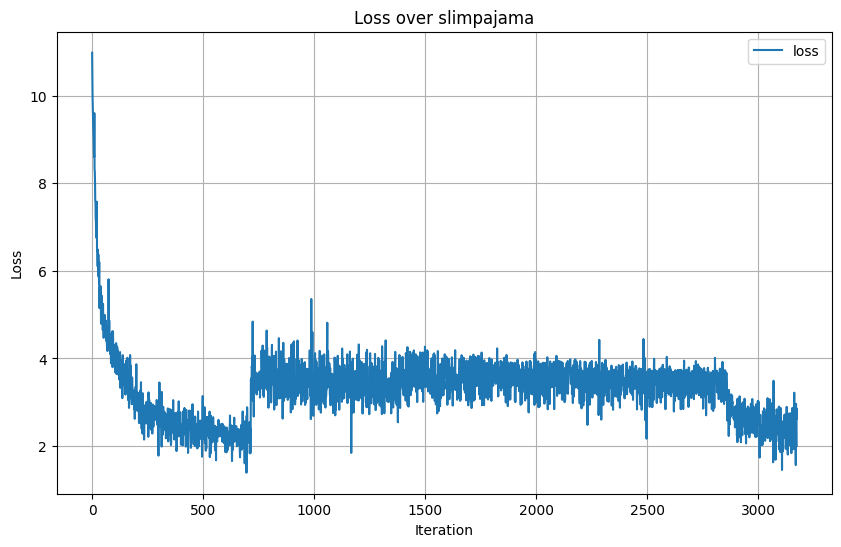

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over slimpajama')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import re
def extract_lm_loss_values(lines):
    lm_loss_values = []
    for line in lines:
        if 'lm_loss' in line:
            matches = re.findall(r'lm_loss\s*[:=]\s*([\d\.]+)', line)
            for match in matches:
                lm_loss_values.append(float(match))
    return lm_loss_values

# Extract lm_loss values from the largest file excerpt
lm_loss_values = extract_lm_loss_values(spj)

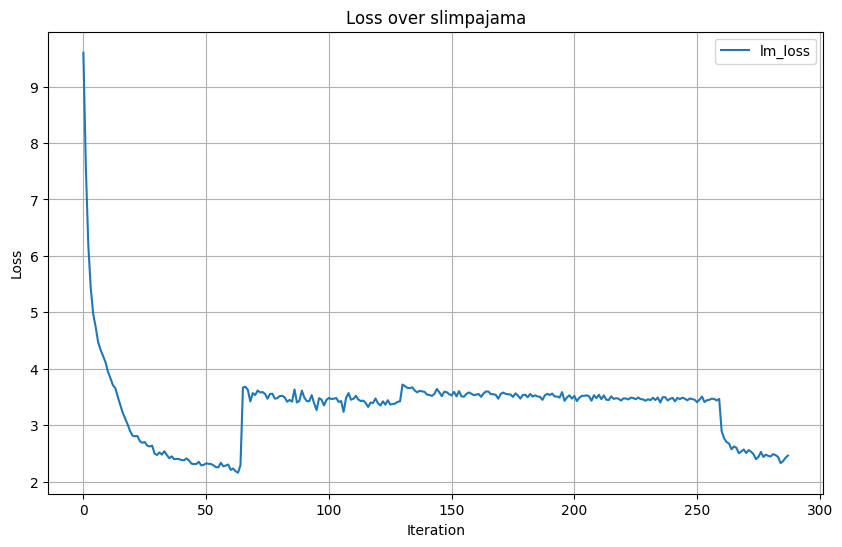

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(lm_loss_values, label='lm_loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over slimpajama')
plt.legend()
plt.grid(True)
plt.show()